In [ ]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz

--2022-09-09 00:14:13--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 00:14:13--  https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 00:14:13--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (ww

In [ ]:
!tar -xvf "/content/BSR_bsds500.tgz"

BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
BSR/bench/source/Matrix.hh
BSR/bench/source/csa.hh
BSR/bench/source/String.hh
BSR/bench/bench_bsds500.m
BSR/bench/data/
BSR/bench/data/groundTruth/
BSR/bench/data/groundTruth/6046.mat
BSR/bench/data/groundTruth/2018.mat
BSR/bench/data/groundTruth/8068.mat
BSR/bench/

In [ ]:
import os
import time
import random
import glob
import numpy as np

import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
os.makedirs("dataset", exist_ok=True)
os.makedirs("dataset/train", exist_ok=True)
os.makedirs("dataset/val", exist_ok=True)
os.makedirs("dataset/test", exist_ok=True)

dir_train_HR2X = "dataset/train/HR2X"
dir_train_HR4X = "dataset/train/HR4X"
dir_train_LR = "dataset/train/LR"
os.makedirs(dir_train_HR2X, exist_ok=True)
os.makedirs(dir_train_HR4X, exist_ok=True)
os.makedirs(dir_train_LR, exist_ok=True)

dir_val_HR2X = "dataset/val/HR2X"
dir_val_HR4X = "dataset/val/HR4X"
dir_val_LR = "dataset/val/LR"
os.makedirs(dir_val_HR2X, exist_ok=True)
os.makedirs(dir_val_HR4X, exist_ok=True)
os.makedirs(dir_val_LR, exist_ok=True)

dir_test_HR2X = "dataset/test/HR2X"
dir_test_HR4X = "dataset/test/HR4X"
dir_test_LR = "dataset/test/LR"
os.makedirs(dir_test_HR2X, exist_ok=True)
os.makedirs(dir_test_HR4X, exist_ok=True)
os.makedirs(dir_test_LR, exist_ok=True)

In [ ]:
def load(path, shape, RGB_convert=True):
    img= cv2.imread(path)
    if RGB_convert:
      img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, shape)
    return img

In [ ]:
def save_data(directory, dir_HR2X, dir_HR4X, dir_LR):
  HR2X=[]
  HR4X=[]
  LR=[]

  for img_path in glob.glob(directory+ str('/*')): 
    img_name = img_path.split("/")[-1]
    if img_name.split('.')[-1] != "jpg":
      continue
    
    img_HR_2X = load(img_path, (192, 192), False)
    cv2.imwrite(os.path.join(dir_HR2X, img_name), img_HR_2X)

    img_HR_4X = load(img_path, (384, 384), False)
    cv2.imwrite(os.path.join(dir_HR4X, img_name), img_HR_4X)

    img_LR = load(img_path, (96,96), False)
    cv2.imwrite(os.path.join(dir_LR, img_name), img_LR)

save_data("/content/BSR/BSDS500/data/images/train", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

# save_data("/content/BSR/BSDS500/data/images/val", 
#           dir_val_HR2X, 
#           dir_val_HR4X,
#           dir_val_LR)

save_data("/content/BSR/BSDS500/data/images/val", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

save_data("/content/BSR/BSDS500/data/images/test", 
          dir_test_HR2X, 
          dir_test_HR4X,
          dir_test_LR)

In [ ]:
def get_data(directory):
  X=[]
  Y=[]
  for folder in glob.glob(directory+str("/*")):
    print(folder)
    for img_path in glob.glob(folder+str("/*")):
      if folder == os.path.join(directory, 'HR4X'):
        X.append(load(img_path, (384, 384)))

      # if folder == os.path.join(directory, 'HR2X'):
      #   X.append(load(img_path, (192, 192)))

      if folder == os.path.join(directory, 'LR'):
        Y.append(load(img_path, (96,96)))

  X= np.array(X)
  Y= np.array(Y)
  return X/255.0, Y/255.0

In [ ]:
HR_train, LR_train = get_data('/content/dataset/train')
HR_train.shape, LR_train.shape

/content/dataset/train/LR
/content/dataset/train/HR4X
/content/dataset/train/HR2X


((300, 384, 384, 3), (300, 96, 96, 3))

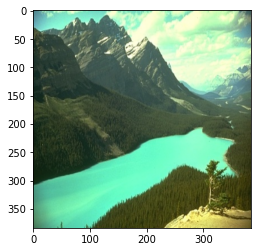

In [ ]:
plt.imshow(HR_train[0])

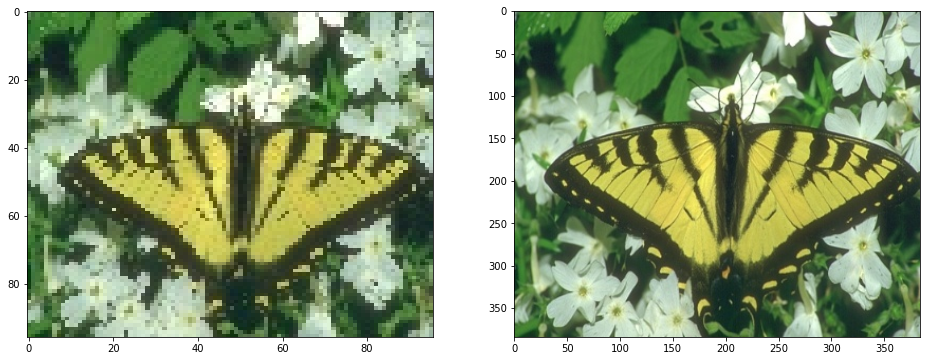

In [ ]:
sample_index = 5

f, ax= plt.subplots(1,2, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(HR_train[sample_index], aspect='auto')
plt.show()

In [ ]:
import tensorflow as tf
from keras.layers import Input, Conv2D, Flatten, Dense, add, BatchNormalization, Activation, LeakyReLU, Layer
from keras.models import Model

In [ ]:
class SubpixelConv2D(Layer):
  """ Subpixel Conv2D Layer
  upsampling a layer from (h, w, c) to (h*r, w*r, c/(r*r)),
  where r is the scaling factor, default to 4
  # Arguments
  upsampling_factor: the scaling factor
  # Input shape
      Arbitrary. Use the keyword argument `input_shape`
      (tuple of integers, does not include the samples axis)
      when using this layer as the first layer in a model.
  # Output shape
      the second and the third dimension increased by a factor of
      `upsampling_factor`; the last layer decreased by a factor of
      `upsampling_factor^2`.
  # References
      Real-Time Single Image and Video Super-Resolution Using an Efficient
      Sub-Pixel Convolutional Neural Network Shi et Al. https://arxiv.org/abs/1609.05158
  """

  def __init__(self, upsampling_factor=2, **kwargs):
    super(SubpixelConv2D, self).__init__(**kwargs)
    self.upsampling_factor = upsampling_factor
  
  def build(self, input_shape):
    last_dim = input_shape[-1]
    factor = self.upsampling_factor * self.upsampling_factor

    if last_dim % (factor) != 0:
      raise ValueError("Channel "+ str(last_dim)+" should be of integer time of upsampling factor ** 2: "+ str(factor)+'.')
  
  def call(self, inputs, **kargs):
    return tf.nn.depth_to_space(inputs, self.upsampling_factor)

  def get_config(self):
    config = {"upsampling_factor": self.upsampling_factor}

    base_config = super(SubpixelConv2D, self).get_config()

    return dict(list(base_config.items()) + list(config.items()))

  def compute_output_shape(self, input_shape):
    factor = self.upsampling_factor * self.upsampling_factor

    input_shape_1 = None
    if input_shape[1] is not None:
        input_shape_1 = input_shape[1] * self.upsampling_factor

    input_shape_2 = None
    if input_shape[2] is not None:
        input_shape_2 = input_shape[2] * self.upsampling_factor

    new_dims = [input_shape[0],
                input_shape_1,
                input_shape_2,
                int(input_shape[3]/factor)
                ]
    return tuple(new_dims)

In [ ]:
#scale_factor = 2
scale_factor = 4

#Model Arch<br>
<img src="/content/model.jpg" />

In [ ]:
#Generator
def Generator(input_shape):
  # w_init = tf.random_normal_initializer(stddev=0.02)
  g_init = tf.random_normal_initializer(1., 0.02)
  relu = Activation('relu')

  input_layer = Input(shape= input_shape)
  x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation= 'relu',
             kernel_initializer='HeNormal')(input_layer)
  temp= x

  # B residual blocks
  for i in range(3):
    b_r = Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                 kernel_initializer='HeNormal')(x)
    b_r = BatchNormalization(gamma_initializer= g_init)(b_r)
    b_r = relu(b_r)

    b_r = Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                 kernel_initializer='HeNormal')(x)
    b_r = BatchNormalization(gamma_initializer= g_init)(b_r)

    b_r = add([x, b_r])
    x = b_r

  x = Conv2D(filters=64, kernel_size=(3,3), padding='same', 
            kernel_initializer='HeNormal')(x)
  x = BatchNormalization(gamma_initializer= g_init)(x)
  x = add([x, temp])
  # B residual blacks end

  for _ in range(scale_factor//2):
    #x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu",
    #          kernel_initializer='HeNormal')(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', 
              kernel_initializer='HeNormal')(x)
    x = SubpixelConv2D(upsampling_factor=2)(x)
    x = relu(x)

  output_layer = Conv2D(filters=3, kernel_size=(1,1), padding='same', 
                        kernel_initializer='HeNormal', activation= 'tanh')(x)
  generator = Model(inputs=input_layer, outputs=output_layer, name="generator")
  return generator

Generator(LR_train.shape[1:]).summary()

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 96, 96, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 96, 96, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 96, 96, 64)  256         ['conv2d_2[0][0]']               
 rmalization)                                                                             

In [ ]:
generator = Generator(LR_train.shape[1:])

In [ ]:
learning_rate = 2e-4

generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
save_samples_dir = "save_samples"

os.makedirs(save_samples_dir, exist_ok=True)

In [ ]:
# %load_ext tensorboard
# from datetime import datetime

# os.makedirs("logs", exist_ok=True)
# os.makedirs("logs/fit", exist_ok=True)

# # Define the Keras TensorBoard callback.
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
import os, shutil

def clear_directory(directory):
  for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    try:
      if os.path.isfile(file_path) or os.path.islink(file_path):
        os.unlink(file_path)
      elif os.path.isdir(file_path):
        shutil.rmtree(file_path)
    except Exception as e:
      print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
clear_directory(save_samples_dir)

In [ ]:
os.makedirs("weights", exist_ok=True)

In [ ]:
import sys

generator_best_weights_directory = "weights/generator_best_weights.h5"
batch_size = 5
n_epoch = 500
total_sample = LR_train.shape[0]
n_steps_epoch = round(n_epoch // batch_size)

# generator.compile(optimizer=generator_optimizer, loss="mse")
# generator.fit(LR_train, HR_train, epochs=n_epoch, batch_size=batch_size, 
#               callbacks=[tensorboard_callback],
#               verbose=1)

lowest_mse_loss = sys.maxsize
for epoch in range(n_epoch):
  start = 0
  end_epoch = True

  while(end_epoch):
    i, j= (start*batch_size), ((start+1)*batch_size)
    if j >= LR_train.shape[0]:
      end_epoch = False
      j = -1
    start += 1
    X, y = LR_train[i:j], HR_train[i:j]

    # generator.compile(optimizer=generator_optimizer, loss="mse")
    # generator.fit(X, y, epochs=1, verbose=0)
    y_hat = generator(X)
    mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(y, y_hat), axis=-1))

    with tf.GradientTape() as tape:
      y_hat = generator(X)
      mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(y, y_hat), axis=-1))
      grad = tape.gradient(mse_loss, generator.trainable_weights)
      generator_optimizer.apply_gradients(zip(grad, generator.trainable_weights))

  print("Epoch: [{}/{}] step: mse: {:.3f}".format(epoch, n_epoch, mse_loss))

  if mse_loss < lowest_mse_loss:
    lowest_mse_loss = mse_loss
    generator.save_weights(generator_best_weights_directory)

  if epoch%10 == 0:
    img = generator.predict(LR_train[np.newaxis, sample_index])[0]

    img = Image.fromarray(np.uint8(img*255))
    img.save(os.path.join(save_samples_dir, "{}_epoch_result.jpg".format(epoch)))

Epoch: [0/500] step: mse: 1.042
Epoch: [1/500] step: mse: 0.768
Epoch: [2/500] step: mse: 0.577
Epoch: [3/500] step: mse: 0.516
Epoch: [4/500] step: mse: 0.448
Epoch: [5/500] step: mse: 0.390
Epoch: [6/500] step: mse: 0.334
Epoch: [7/500] step: mse: 0.347
Epoch: [8/500] step: mse: 0.308
Epoch: [9/500] step: mse: 0.298
Epoch: [10/500] step: mse: 0.322
Epoch: [11/500] step: mse: 0.311
Epoch: [12/500] step: mse: 0.262
Epoch: [13/500] step: mse: 0.245
Epoch: [14/500] step: mse: 0.277
Epoch: [15/500] step: mse: 0.243
Epoch: [16/500] step: mse: 0.217
Epoch: [17/500] step: mse: 0.259
Epoch: [18/500] step: mse: 0.221
Epoch: [19/500] step: mse: 0.227
Epoch: [20/500] step: mse: 0.212
Epoch: [21/500] step: mse: 0.234
Epoch: [22/500] step: mse: 0.179
Epoch: [23/500] step: mse: 0.205
Epoch: [24/500] step: mse: 0.203
Epoch: [25/500] step: mse: 0.200
Epoch: [26/500] step: mse: 0.186
Epoch: [27/500] step: mse: 0.177
Epoch: [28/500] step: mse: 0.152
Epoch: [29/500] step: mse: 0.174
Epoch: [30/500] step

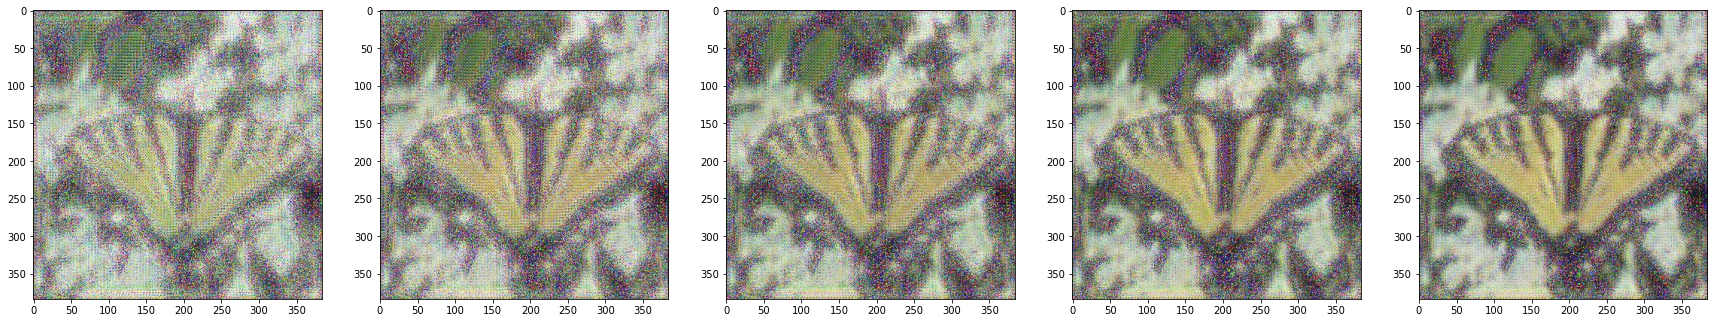

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(30, 15))
for i, file in enumerate(sorted(glob.glob(save_samples_dir+str("/*")))[-5:]):
  img = load(file, shape=HR_train.shape[1:-1])
  ax[i].imshow(img)

plt.show()

In [ ]:
clear_directory(save_samples_dir)

In [ ]:
# discriminator
def Discriminator(input_shape):
  g_init= tf.random_normal_initializer(1., 0.02)
  ly_relu= LeakyReLU(alpha= 0.2)
  df_dim = 16

  input_layer = Input(input_shape)
  x = Conv2D(filters=64, kernel_size=(4, 4), strides=(2, 2), padding='SAME', 
             kernel_initializer='HeNormal')(input_layer)
  x = ly_relu(x)

  for i in range(2, 6):
    x = Conv2D(filters=df_dim*(2**i), kernel_size=(4, 4), strides=(2, 2), 
                padding='SAME', kernel_initializer='HeNormal')(x)
    x = ly_relu(x)
    x = BatchNormalization(gamma_initializer= g_init)(x)

  x = Conv2D(filters=df_dim*16, kernel_size=(1, 1), strides=(1, 1), padding='SAME', 
            kernel_initializer='HeNormal')(x)
  x = ly_relu(x)
  x = BatchNormalization(gamma_initializer= g_init)(x)

  x = Conv2D(filters=df_dim*8, kernel_size=(1, 1), strides=(1, 1), padding='SAME', 
            kernel_initializer='HeNormal')(x)
  x = BatchNormalization(gamma_initializer= g_init)(x)
  temp = x

  x = Conv2D(filters=df_dim*4, kernel_size=(3, 3), strides=(1, 1), padding='SAME', 
            kernel_initializer='HeNormal')(x)
  x = ly_relu(x)
  x = BatchNormalization(gamma_initializer= g_init)(x)

  x = Conv2D(filters=df_dim*8, kernel_size=(3, 3), strides=(1, 1), padding='SAME', 
            kernel_initializer='HeNormal')(x)
  x = BatchNormalization(gamma_initializer= g_init)(x)

  x = add([x, temp])
  x = Flatten()(x)
  output_layer = Dense(units=1, kernel_initializer='HeNormal', activation= 'sigmoid')(x)

  discriminator = Model(inputs=input_layer, outputs=output_layer, name="discriminator")

  return discriminator
   
# Discriminator(HR_train.shape[1:]).summary()

In [ ]:
# VGG19
def vgg19_model(input_shape):
  vgg= tf.keras.applications.VGG19(include_top=False, weights='imagenet', 
                                  input_shape=input_shape)
  input_layer = Input(shape=input_shape)
  x = vgg.layers[0](input_layer)
  for ly in vgg.layers[1:17]:
    x = ly(x)
  VGG19= Model(input_layer, x)
  return VGG19

# vgg19_model(HR_train.shape[1:]).summary()

In [ ]:
discriminator = Discriminator(HR_train.shape[1:])
vgg = vgg19_model(HR_train.shape[1:])

In [ ]:
generator_optimizer = tf.optimizers.Adam(learning_rate)
discriminator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
n_epoch = 500

for epoch in range(n_epoch):
  start = 0
  end_epoch = True

  while(end_epoch):
    i, j= (start*batch_size), ((start+1)*batch_size)
    if j >= LR_train.shape[0]:
      end_epoch = False
      j = -1
    start += 1
    
    X, Y = LR_train[i: j], HR_train[i: j]
    lowest_mse_loss = sys.maxsize

    with tf.GradientTape(persistent=True) as tape:
      fake_img = generator(X)
      fake_logits = discriminator(fake_img)
      real_logits = discriminator(Y)
      fake_feature = vgg(fake_img)
      real_feature = vgg(Y)

      #discriminator. loss
      d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits , tf.zeros_like(fake_logits)))
      d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(real_logits,tf.ones_like(real_logits)))
      d_loss= d_loss_fake + d_loss_real

      #generator. loss
      g_loss= tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(fake_logits , 
                                                                    tf.ones_like(fake_logits)))
      mse_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_img, Y), axis=-1))
      vgg_loss = tf.reduce_mean(tf.reduce_mean(tf.math.squared_difference(fake_feature, real_feature), axis=-1))

      g_loss = mse_loss + vgg_loss + g_loss

      grad = tape.gradient(g_loss, generator.trainable_weights)
      generator_optimizer.apply_gradients(zip(grad, generator.trainable_weights))

      grad = tape.gradient(d_loss, discriminator.trainable_weights)
      discriminator_optimizer.apply_gradients(zip(grad, discriminator.trainable_weights))
      
  print("Epoch: [{}/{}] step: Discriminator.loss: {:.3f}: Generator.loss: {:.3f}".format(
          epoch, n_epoch , d_loss, g_loss))
  
  if g_loss < lowest_mse_loss:
    lowest_mse_loss = g_loss
    generator.save_weights(generator_best_weights_directory)

  if epoch%20 == 0:
      img = generator.predict(LR_train[np.newaxis, sample_index])[0]
      img = Image.fromarray(np.uint8(img*255))
      img.save(os.path.join(save_samples_dir, "{}_epoch_result.jpg".format(epoch)))

Epoch: [0/500] step: Discriminator.loss: 1.006: Generator.loss: 4.276
Epoch: [1/500] step: Discriminator.loss: 1.006: Generator.loss: 5.112
Epoch: [2/500] step: Discriminator.loss: 1.006: Generator.loss: 4.162
Epoch: [3/500] step: Discriminator.loss: 1.006: Generator.loss: 5.317
Epoch: [4/500] step: Discriminator.loss: 1.006: Generator.loss: 4.750
Epoch: [5/500] step: Discriminator.loss: 1.006: Generator.loss: 3.857
Epoch: [6/500] step: Discriminator.loss: 1.006: Generator.loss: 4.337
Epoch: [7/500] step: Discriminator.loss: 1.006: Generator.loss: 6.299
Epoch: [8/500] step: Discriminator.loss: 1.006: Generator.loss: 4.753
Epoch: [9/500] step: Discriminator.loss: 1.006: Generator.loss: 4.449
Epoch: [10/500] step: Discriminator.loss: 1.006: Generator.loss: 5.255
Epoch: [11/500] step: Discriminator.loss: 1.006: Generator.loss: 4.939
Epoch: [12/500] step: Discriminator.loss: 1.006: Generator.loss: 4.591
Epoch: [13/500] step: Discriminator.loss: 1.006: Generator.loss: 3.464
Epoch: [14/500] 

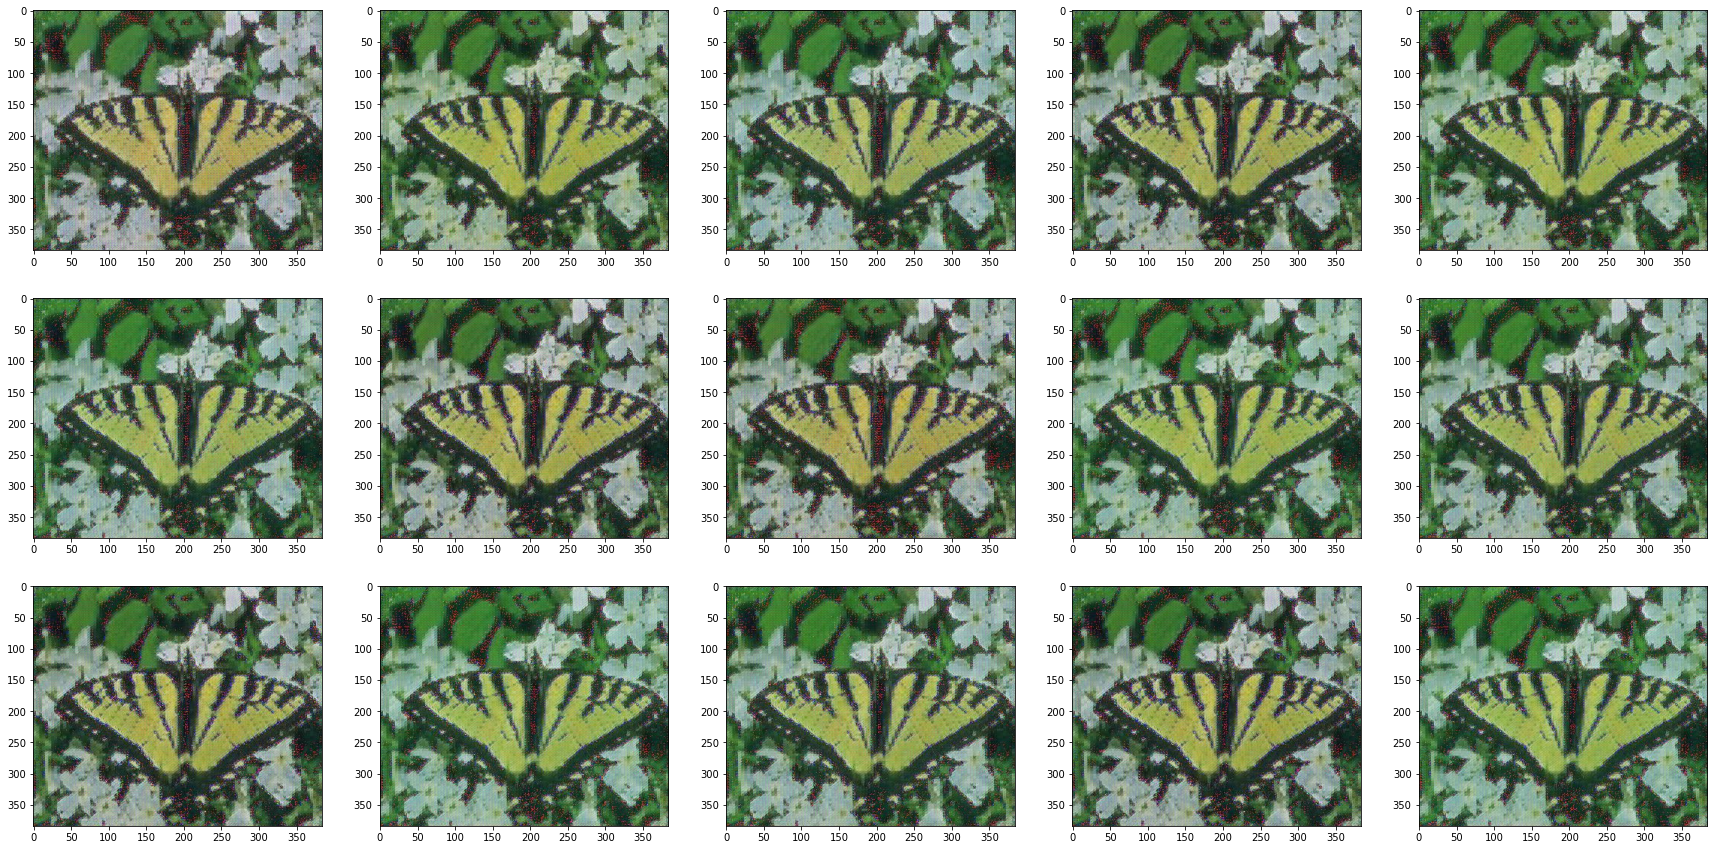

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(30, 15))
for i, file in enumerate(sorted(glob.glob(save_samples_dir+str("/*")))[:15]):
  img = load(file, shape=HR_train.shape[1:-1])
  ax[i//5][i%5].imshow(img, aspect="auto")
  
plt.show()

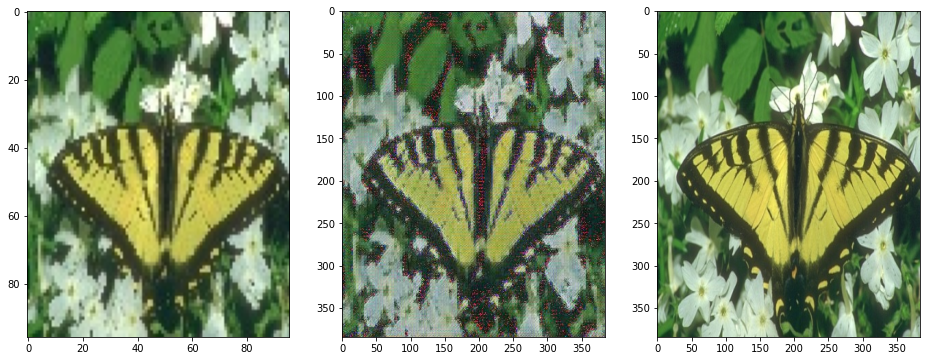

In [ ]:
f, ax= plt.subplots(1,3, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(load(sorted(glob.glob(save_samples_dir+str("/*")))[-1], (384, 384)), aspect='auto')
ax[2].imshow(HR_train[sample_index], aspect='auto')
plt.show()